In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train['Gender'] = train['Gender'].fillna('Male')
train['Married'] = train['Married'].fillna('Yes')
train['Dependents'] = train['Dependents'].fillna('0')
train['Self_Employed'] = train['Self_Employed'].fillna('No')
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna('360')
train.Credit_History = train.Credit_History.fillna(1.0)

In [4]:
X = train.iloc[:, 6:11].values
y = train.iloc[:, -1].values



In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Measuring Accuracy
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_pred, y_test)
cm

array([[15,  2],
       [18, 88]], dtype=int64)

In [21]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of logistic regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of logistic regression is:  0.8373983739837398


Text(0.5,15,'predicted label')

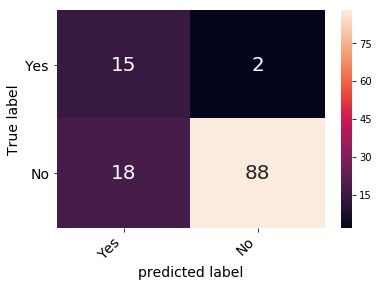

In [24]:
cm_df = pd.ataFrame(cm, ('Yes', 'No'),('Yes', 'No'))
heatmap = sns.heatmap(cm_df, annot = True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('predicted label', fontsize = 14)

In [42]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of naive_bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of naive_bayes is:  0.8292682926829268


In [28]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn import metrics
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is:  0.6991869918699187


In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn import metrics
print('The accuracy of Random Forest is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest is:  0.7560975609756098


In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn import metrics
print('The accuracy of svm is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of svm is:  0.8292682926829268


In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.8211382113821138


In [40]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16 17]
 [ 5 85]]
